**Data Dictionary**

**Task to perform**
 - predict the target variable Rain_Tomorrow the column which are the input are as follows:

- DATE: the date if each day is provided to check the data is consistent, we can break date in day, month and year.

- LOCATION: Albury, New castle, Richmode and other areas of Australia is covered

- MIN TEMP: Min temperatura of each location is provided which helps to check the humidity of the environment

- MAX TEMP: Max temperature is given to check the probablity of rain

- RANFALL: Rainfall record is also given, there are som areas where 0.0 value is given so there were no rain happen about 10 years in that region.

- EVAPORATION: Mostly the value of evaporation is NAN in different areas.

- SUNSHNE: Sunshine value is mostly null in areas which the cloudy environment.

- WIND GUST DIR: The direction od wind blowing is provided there.

- WIND GUST SPEED: The speed of wind is also provided there.

- WindDir9am : The direction of wind at specific time is there so the comparison b/w different times will help in analysis of Rain_Tomorrow.

- WindDir3pm : Speed direction at 3pm

- WindSpeed9am : Within Australia, wind speeds are generally presented in kilometres per hour. Thats why different time stamp wind speed is given there.

- WindSpeed3pm : As above, due to change of wind speed per hour, this will help to predict the target variable.

- Humidity9am : The humidity ranges b/w 6 hours in Australia.

- Humidity3pm : As above, 6 hours change is provided for analysis

- Pressure9am : Pressure rate per 6 hours is given

- Pressure3pm : As it ranges or varies from 6 hours, the data will help to find accurate results.

- Cloud9am : The weather changes about 6 hours

- Cloud3pm : 6 hours gap in cloudy env data will helpful in prediction.

- Temp9am : Temperature varien from north to south

- Temp3pm : Temperature also varies fom 6 hours time stamp

- RainToday : Rain Today is helpful to predict either its going to rai tomorrow.

- RainTomorrow : Rain Tomorrow is our target variable to predict the rain in Australia by using above given features.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import *
from keras.layers import *

In [2]:
data = pd.read_csv("/content/weatherAUS.csv", encoding_errors = "ignore")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
days = pd.to_datetime(data["Date"]).dt.day
month = pd.to_datetime(data["Date"]).dt.month
year = pd.to_datetime(data["Date"]).dt.year
day_name = pd.to_datetime(data["Date"]).dt.day_name()

In [8]:
day_name

0            Monday
1           Tuesday
2         Wednesday
3          Thursday
4            Friday
            ...    
145455    Wednesday
145456     Thursday
145457       Friday
145458     Saturday
145459       Sunday
Name: Date, Length: 145460, dtype: object

In [9]:
def preprocessing(data):
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
            data[col].fillna(data[col].mode()[0], inplace = True)
            days = pd.to_datetime(data["Date"]).dt.day
            month = pd.to_datetime(data["Date"]).dt.month
            year = pd.to_datetime(data["Date"]).dt.year
            day_name = pd.to_datetime(data["Date"]).dt.day_name()
            data["days"] = days
            data["month"] = month
            data["year"] = year
            data["day_name"] = day_name
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

In [10]:
categorical_cols,continious_cols, data_preprocessed = preprocessing(data)

In [11]:
categorical_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
continious_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
data_preprocessed

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,days,month,year,day_name
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,8.000000,4.50993,16.9,21.8,No,No,1,12,2008,Monday
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,4.447461,4.50993,17.2,24.3,No,No,2,12,2008,Tuesday
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,4.447461,2.00000,21.0,23.2,No,No,3,12,2008,Wednesday
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,4.447461,4.50993,18.1,26.5,No,No,4,12,2008,Thursday
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,7.000000,8.00000,17.8,29.7,No,No,5,12,2008,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,4.447461,4.50993,10.1,22.4,No,No,21,6,2017,Wednesday
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,4.447461,4.50993,10.9,24.5,No,No,22,6,2017,Thursday
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,4.447461,4.50993,12.5,26.1,No,No,23,6,2017,Friday
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,3.000000,2.00000,15.1,26.0,No,No,24,6,2017,Saturday


In [14]:
data_preprocessed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
days             0
month            0
year             0
day_name         0
dtype: int64

**Q1. In which location the intensity of rainfall is very high?**

In [15]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name'],
      dtype='object')

In [16]:
data_preprocessed[['Location','RainToday', 'RainTomorrow']]

,Location,RainToday,RainTomorrow
0,Albury,No,No
1,Albury,No,No
2,Albury,No,No
3,Albury,No,No
4,Albury,No,No
...,...,...,...
145455,Uluru,No,No
145456,Uluru,No,No
145457,Uluru,No,No
145458,Uluru,No,No


In [17]:
data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = False).head(10)

Location      RainToday  RainTomorrow
AliceSprings  No         No              2655
Woomera       No         No              2650
Mildura       No         No              2449
Canberra      No         No              2402
Cobar         No         No              2377
Moree         No         No              2345
Townsville    No         No              2260
Perth         No         No              2226
SalmonGums    No         No              2222
PearceRAAF    No         No              2211
Name: RainToday, dtype: int64

In [18]:
data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = True).head(10)

Location      RainToday  RainTomorrow
Uluru         Yes        Yes              39
Woomera       Yes        Yes              45
Uluru         No         Yes              77
              Yes        No               77
Nhil          Yes        Yes              81
Mildura       Yes        Yes              94
AliceSprings  Yes        Yes             103
Moree         Yes        Yes             124
Katherine     Yes        No              132
              No         Yes             132
Name: RainToday, dtype: int64

- For the top 10 recorded locations based on rainfall count , there was no rainfall reported.
-  For the bottom 10 recorded locations based on rainfall count , Uluru repeats 3 / 4 times for all the possible combinations for RainToday and RainTomorrow. Here, the climate keeps on changing very requently.

In [19]:
plot_df = pd.DataFrame(data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])['RainTomorrow'].count().sort_values(ascending = False).head(10))

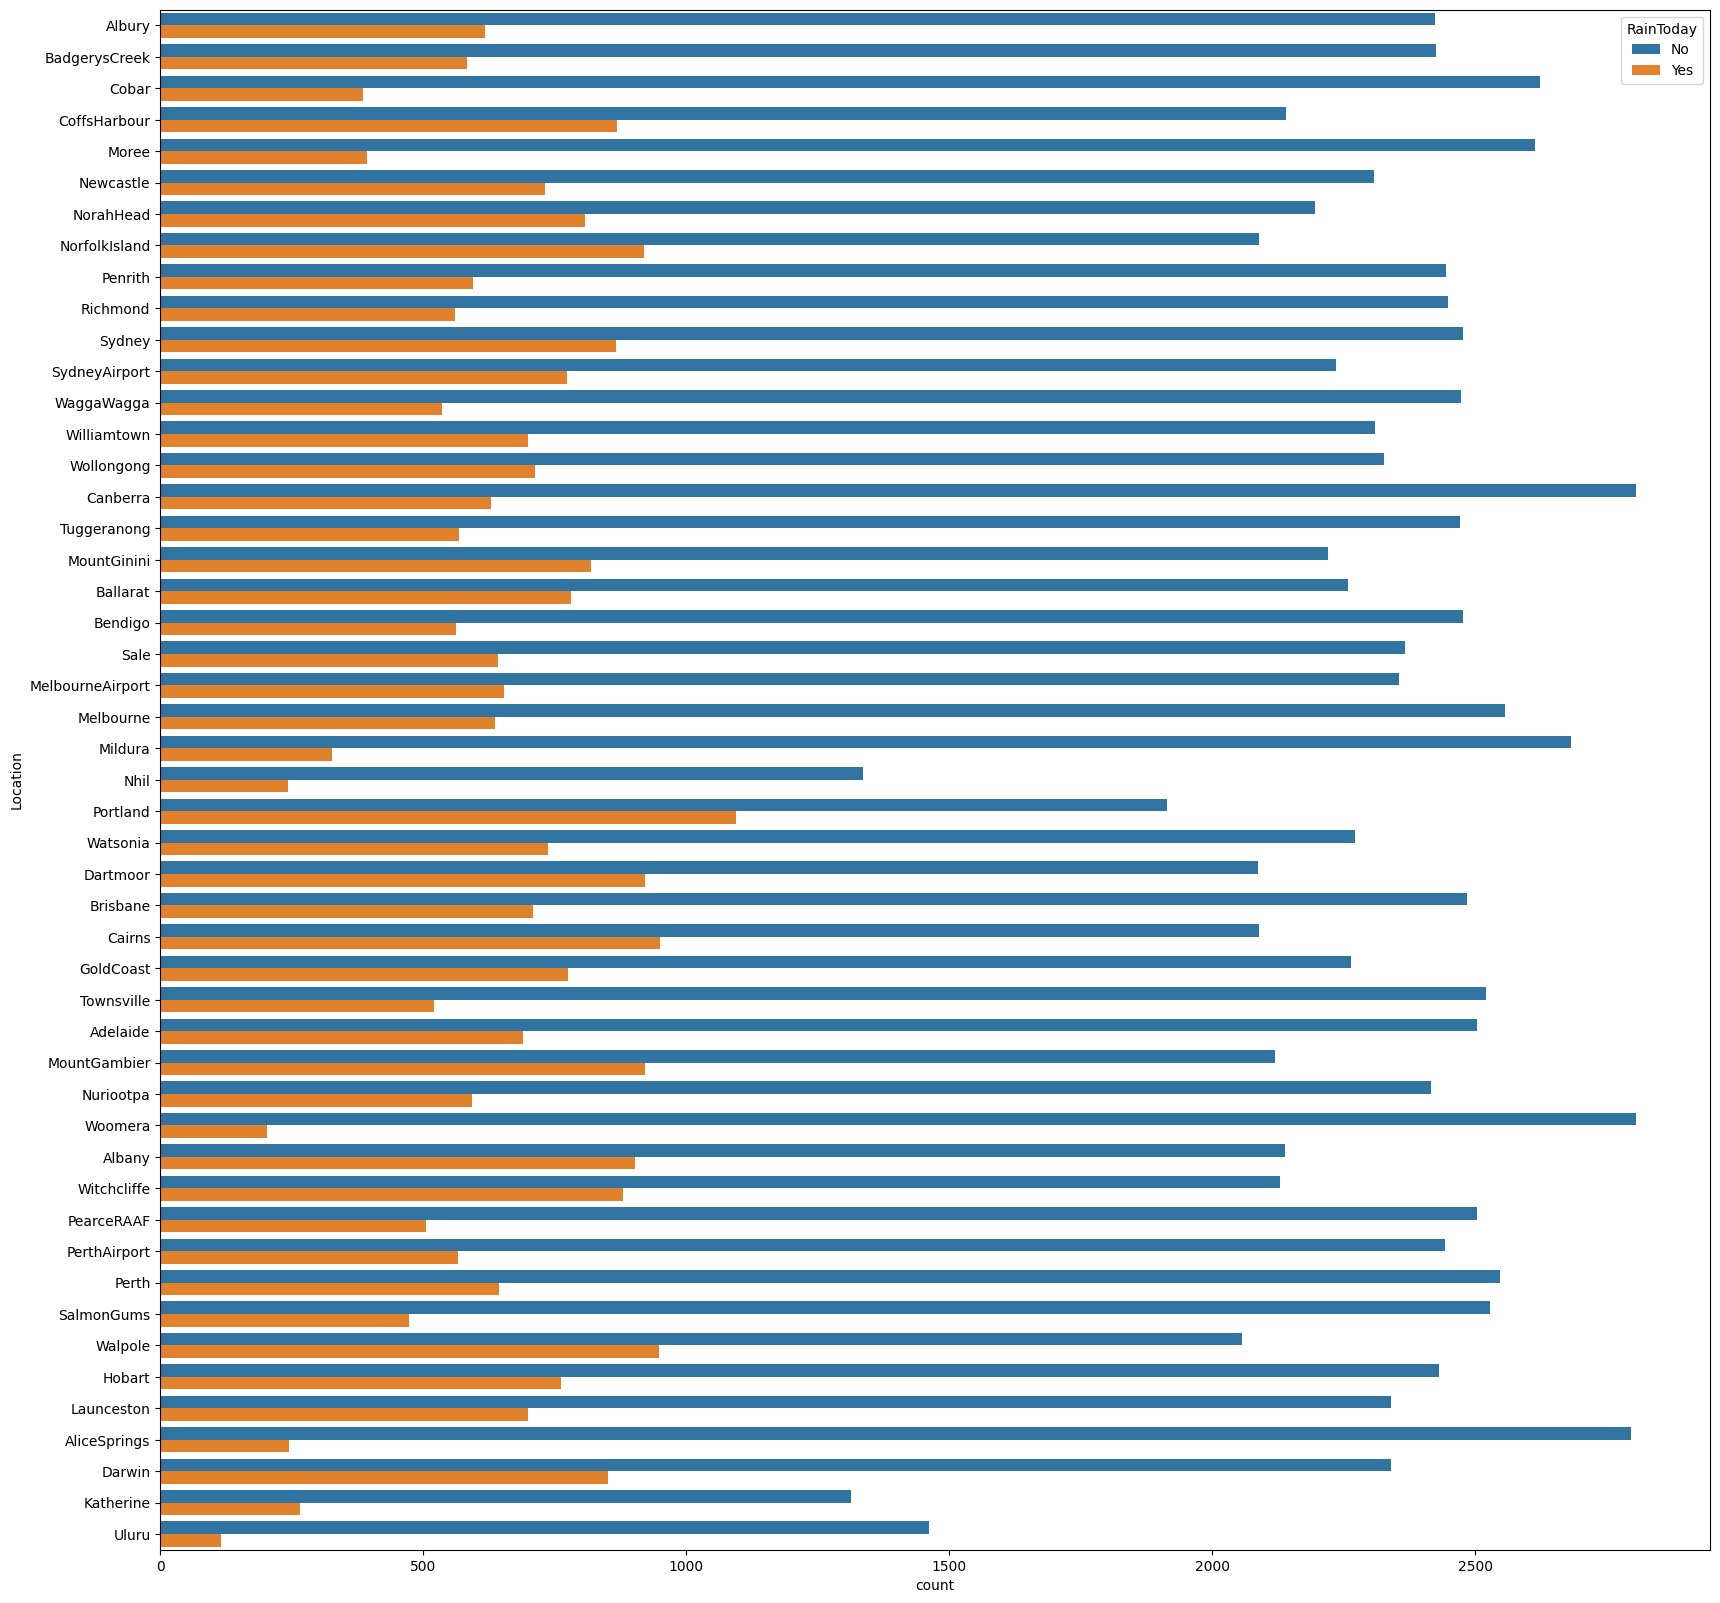

In [20]:
plot_df = data_preprocessed[['Location','RainToday', 'RainTomorrow']]
# plot_df = pd.DataFrame(data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])sort_values(by='RainToday', ascending = False).head(10))
plt.figure(figsize = [20, 20])
sns.countplot(data = plot_df , y = 'Location',hue ='RainToday', orient = 'h')
plt.show();

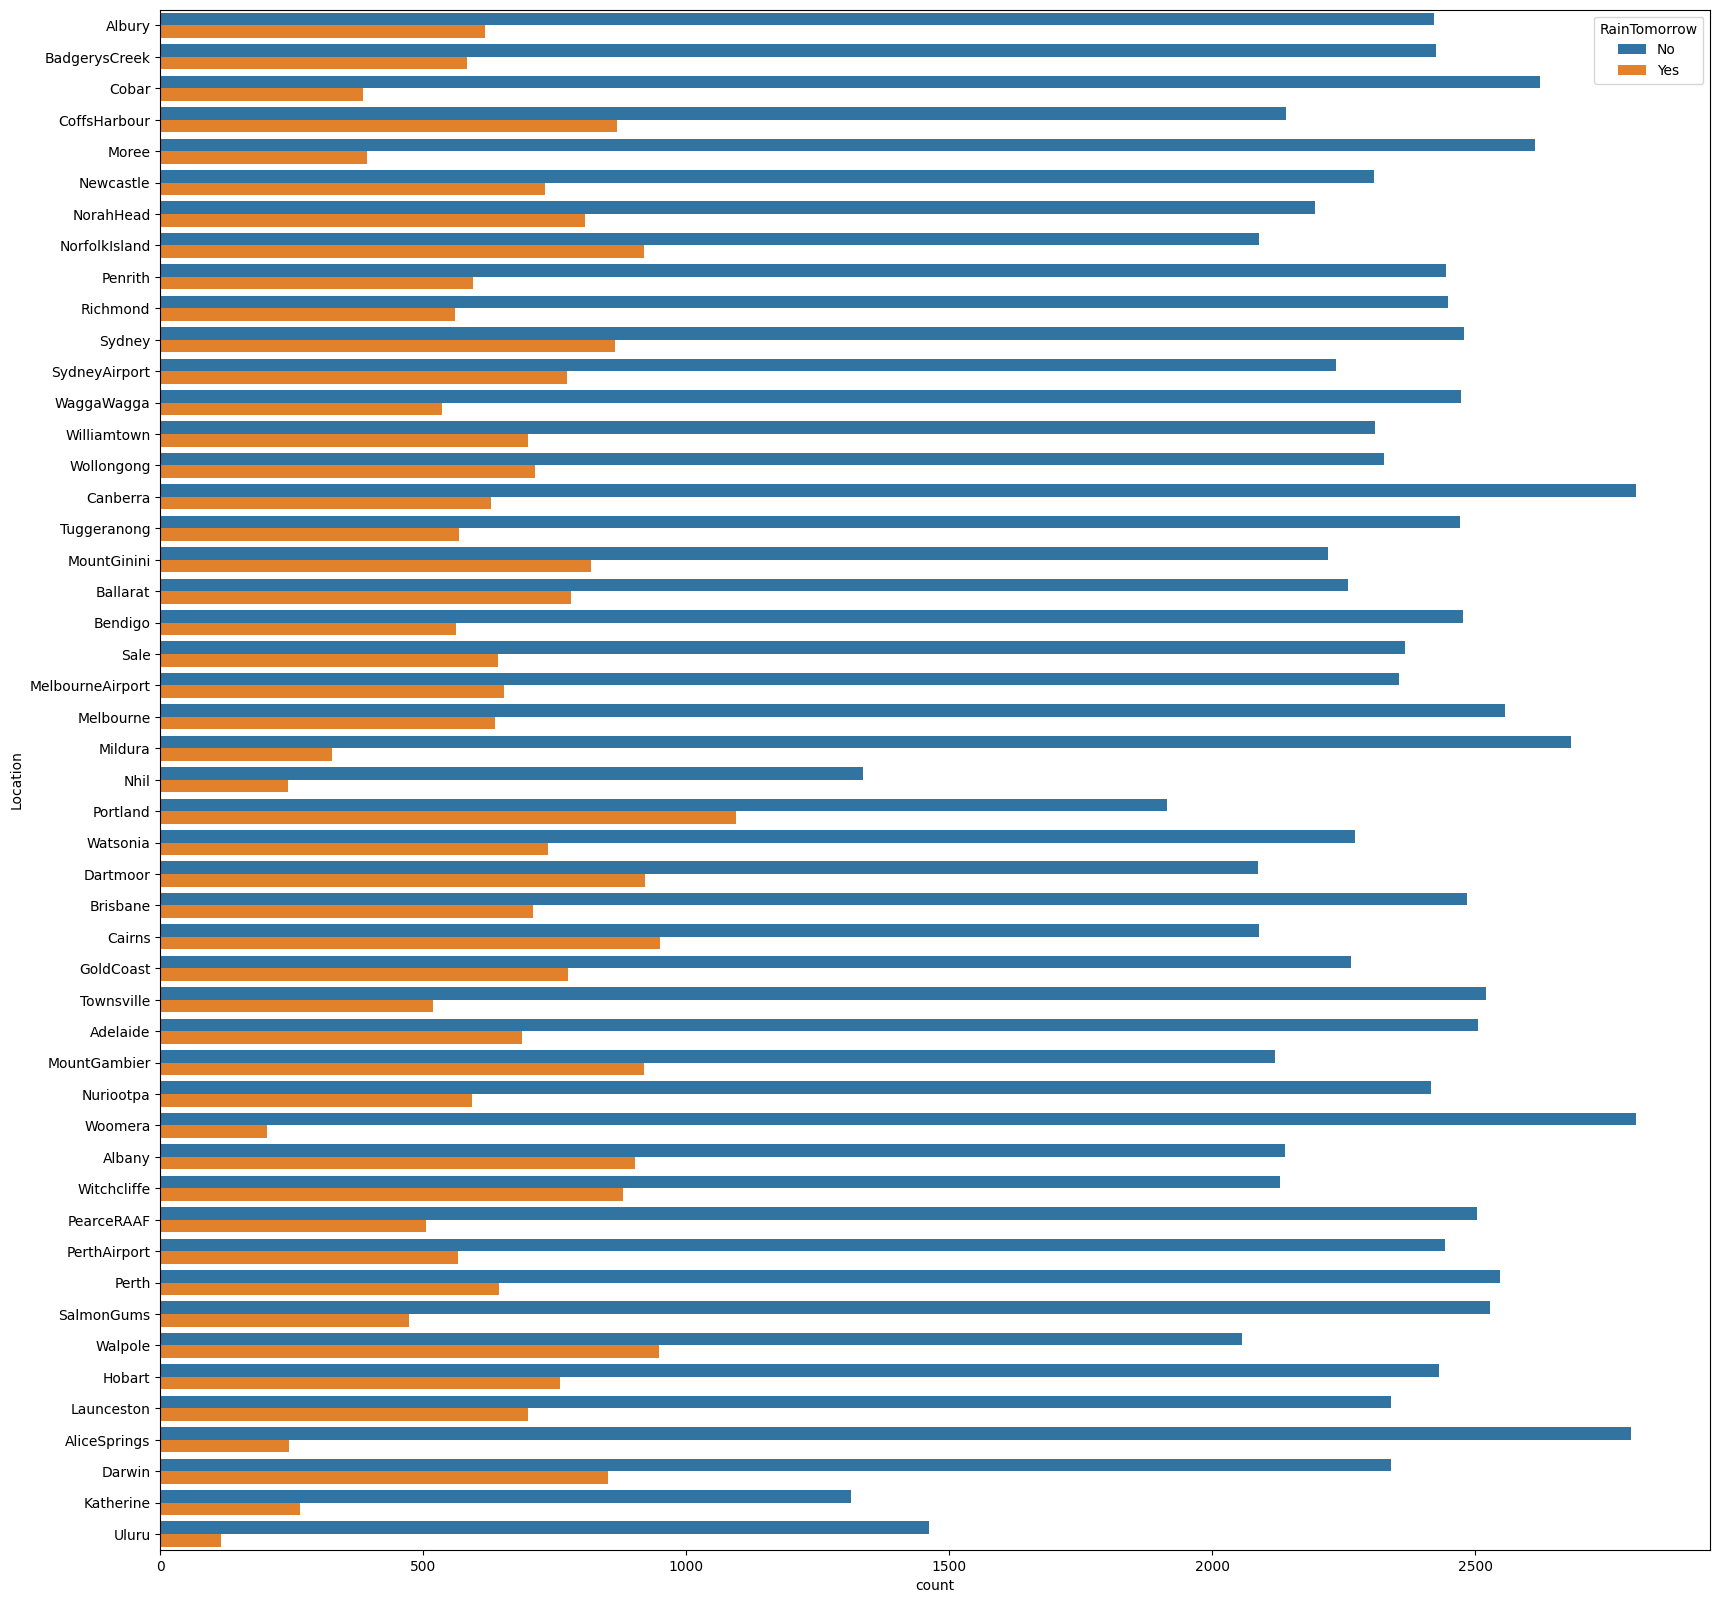

In [21]:
plot_df = data_preprocessed[['Location','RainToday', 'RainTomorrow']]
plt.figure(figsize = [20, 20])
sns.countplot(data = plot_df , y = 'Location',hue ='RainTomorrow', orient = 'h')
plt.show();

**Q2. In which month the intensity of rainfall is very high?**

In [22]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name'],
      dtype='object')

In [23]:
data_preprocessed[['month','RainToday', 'RainTomorrow']]

,month,RainToday,RainTomorrow
0,12,No,No
1,12,No,No
2,12,No,No
3,12,No,No
4,12,No,No
...,...,...,...
145455,6,No,No
145456,6,No,No
145457,6,No,No
145458,6,No,No


In [24]:
data_preprocessed.groupby(by= ['month','RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = False).head(10)

month  RainToday  RainTomorrow
1      No         No              9438
3      No         No              8998
5      No         No              8876
10     No         No              8262
6      No         No              7834
11     No         No              7825
4      No         No              7798
8      No         No              7593
9      No         No              7493
12     No         No              7492
Name: RainToday, dtype: int64

In [25]:
data_preprocessed.groupby(by= ['month','RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = True).head(10)

month  RainToday  RainTomorrow
10     Yes        Yes              865
12     Yes        Yes              953
11     Yes        Yes             1007
2      Yes        Yes             1047
9      Yes        Yes             1059
2      Yes        No              1129
1      Yes        Yes             1147
2      No         Yes             1160
4      Yes        Yes             1162
3      Yes        Yes             1249
Name: RainToday, dtype: int64

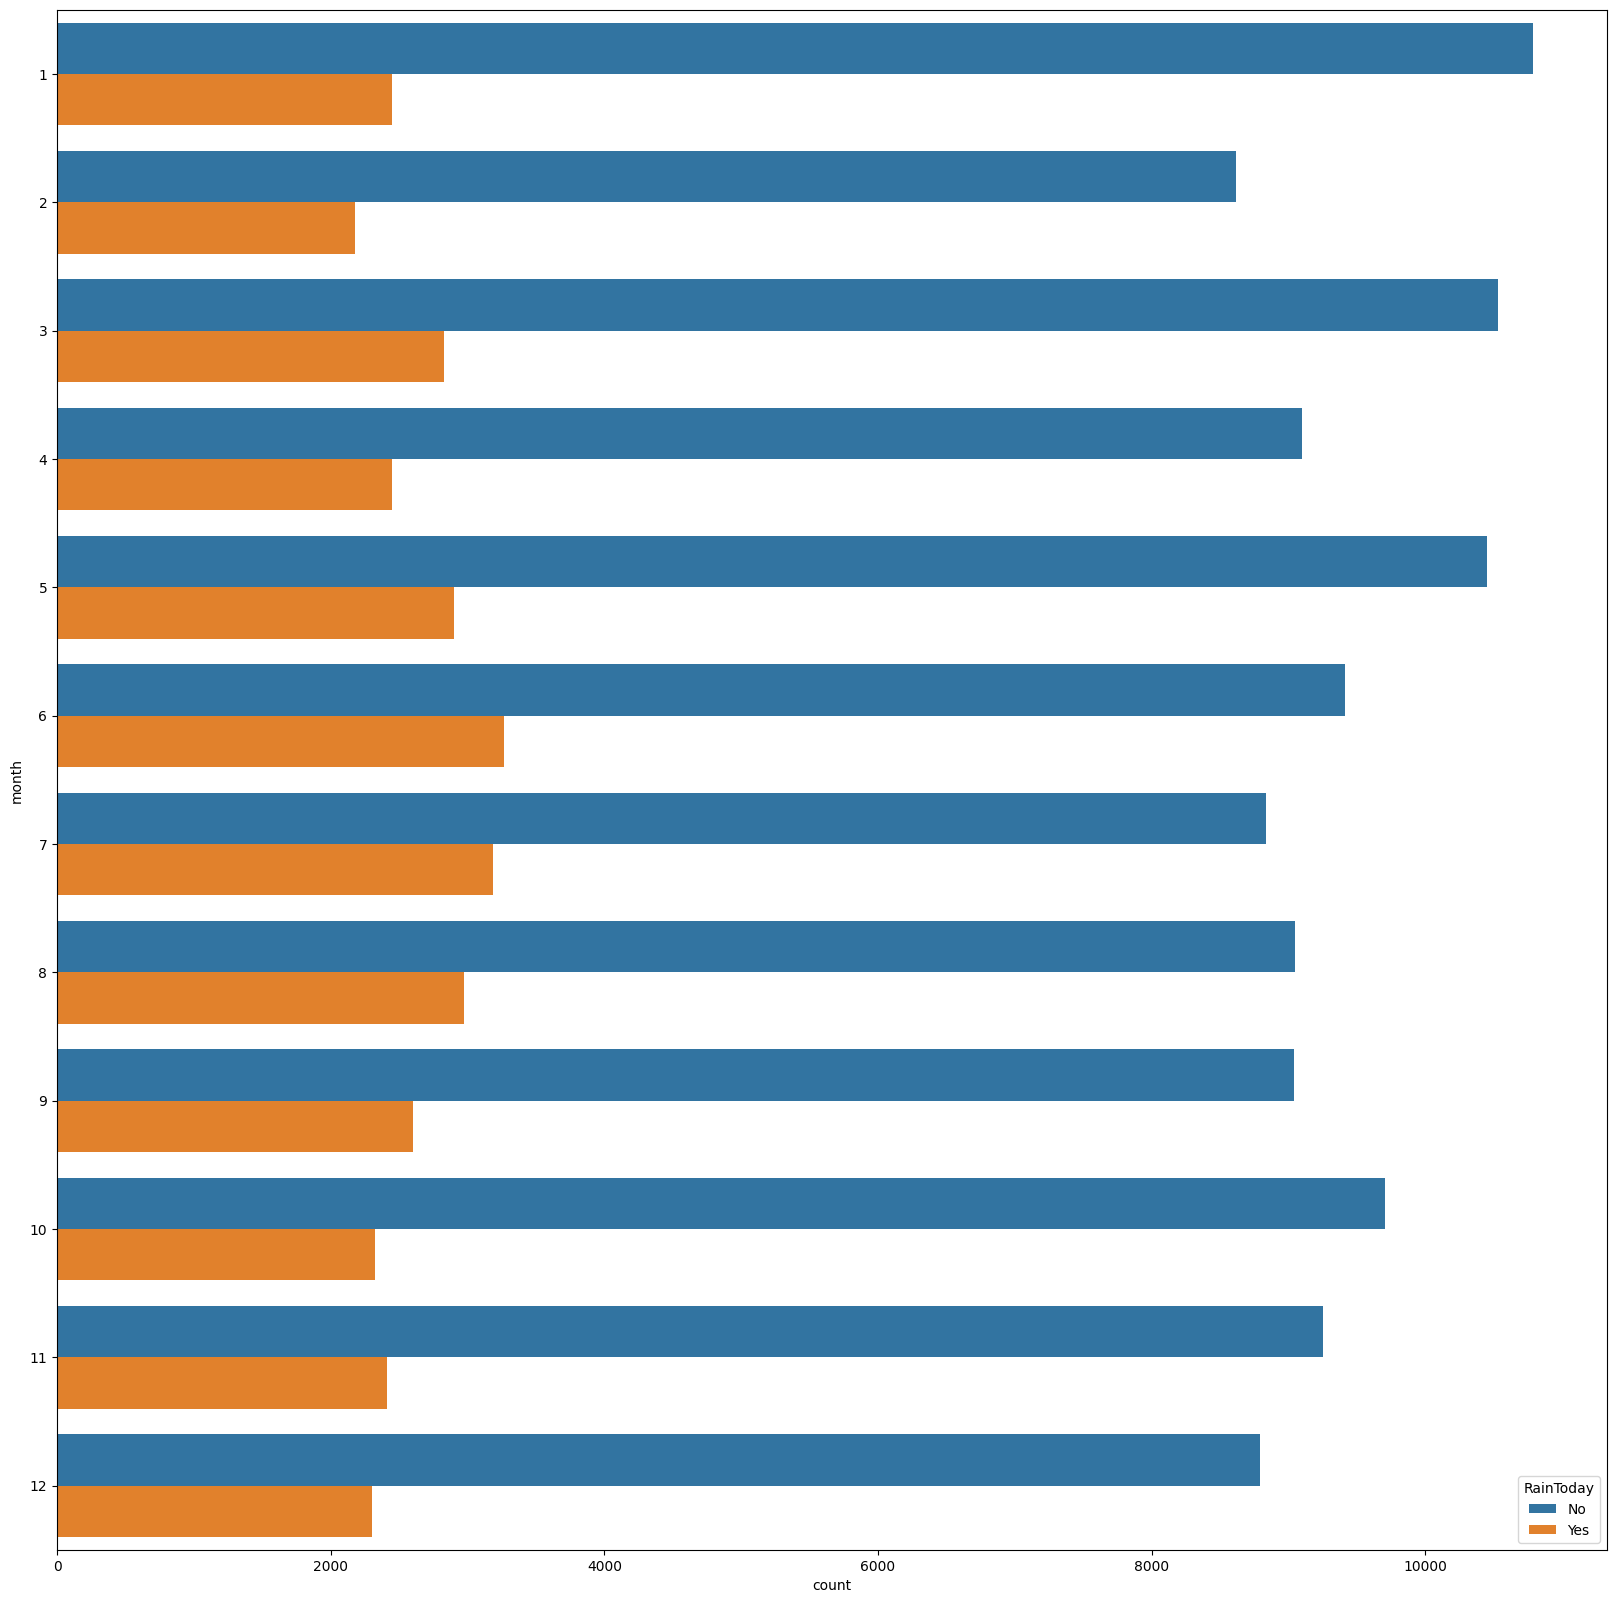

In [26]:
plot_df = data_preprocessed[['month','RainToday', 'RainTomorrow']]
# plot_df = pd.DataFrame(data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])sort_values(by='RainToday', ascending = False).head(10))
plt.figure(figsize = [20, 20])
sns.countplot(data = plot_df , y = 'month',hue ='RainToday', orient = 'h')
plt.show();

**Q3. In which day the intensity of rainfall is very high?**

In [27]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name'],
      dtype='object')

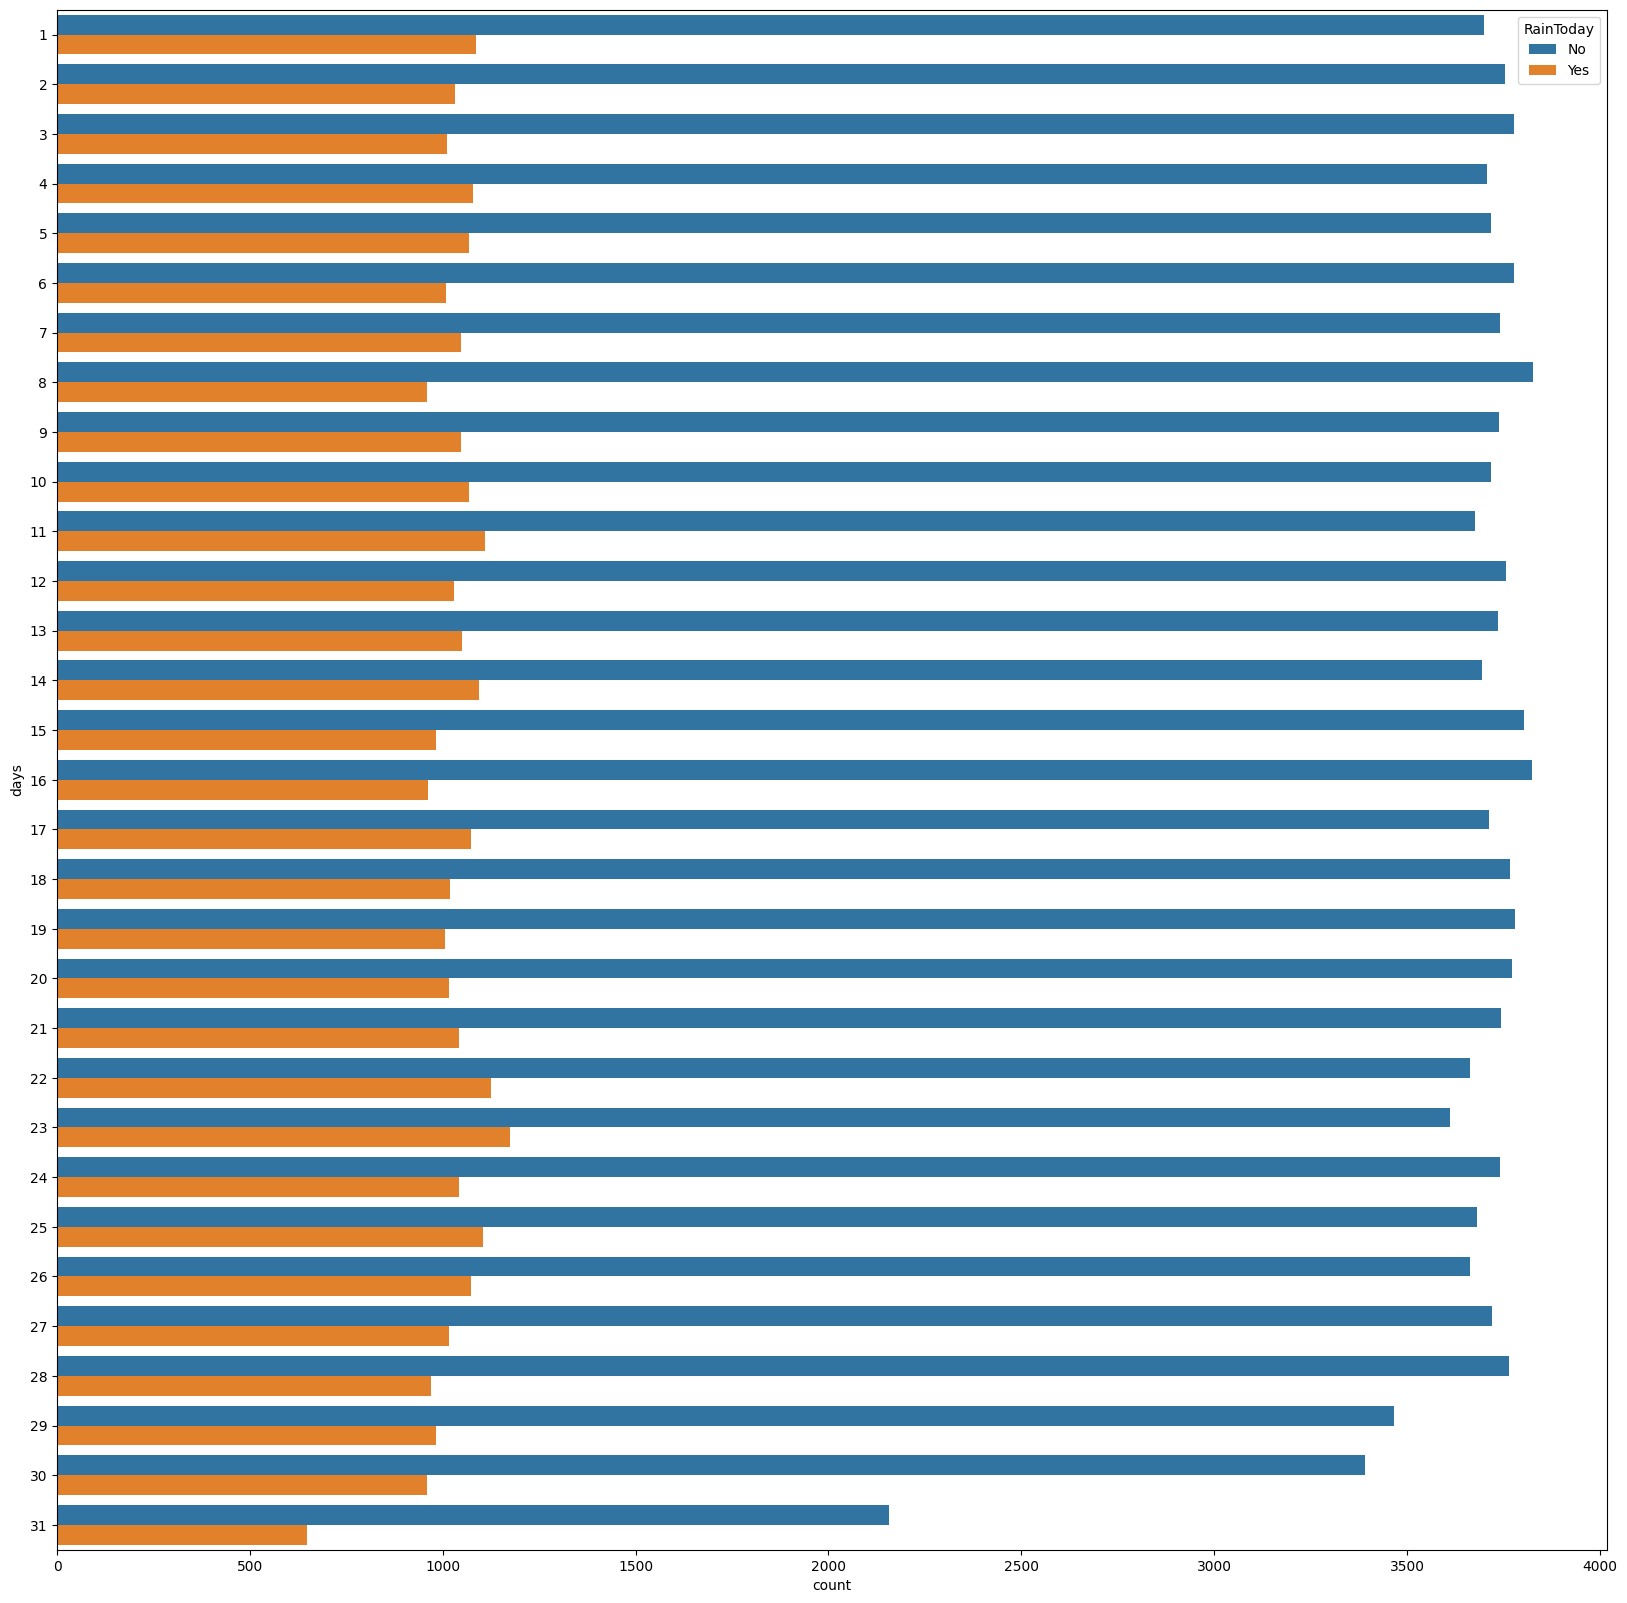

In [28]:
plot_df = data_preprocessed[['days','RainToday', 'RainTomorrow']]
# plot_df = pd.DataFrame(data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])sort_values(by='RainToday', ascending = False).head(10))
plt.figure(figsize = [20, 20])
sns.countplot(data = plot_df , y = 'days',hue ='RainToday', orient = 'h')
plt.show();

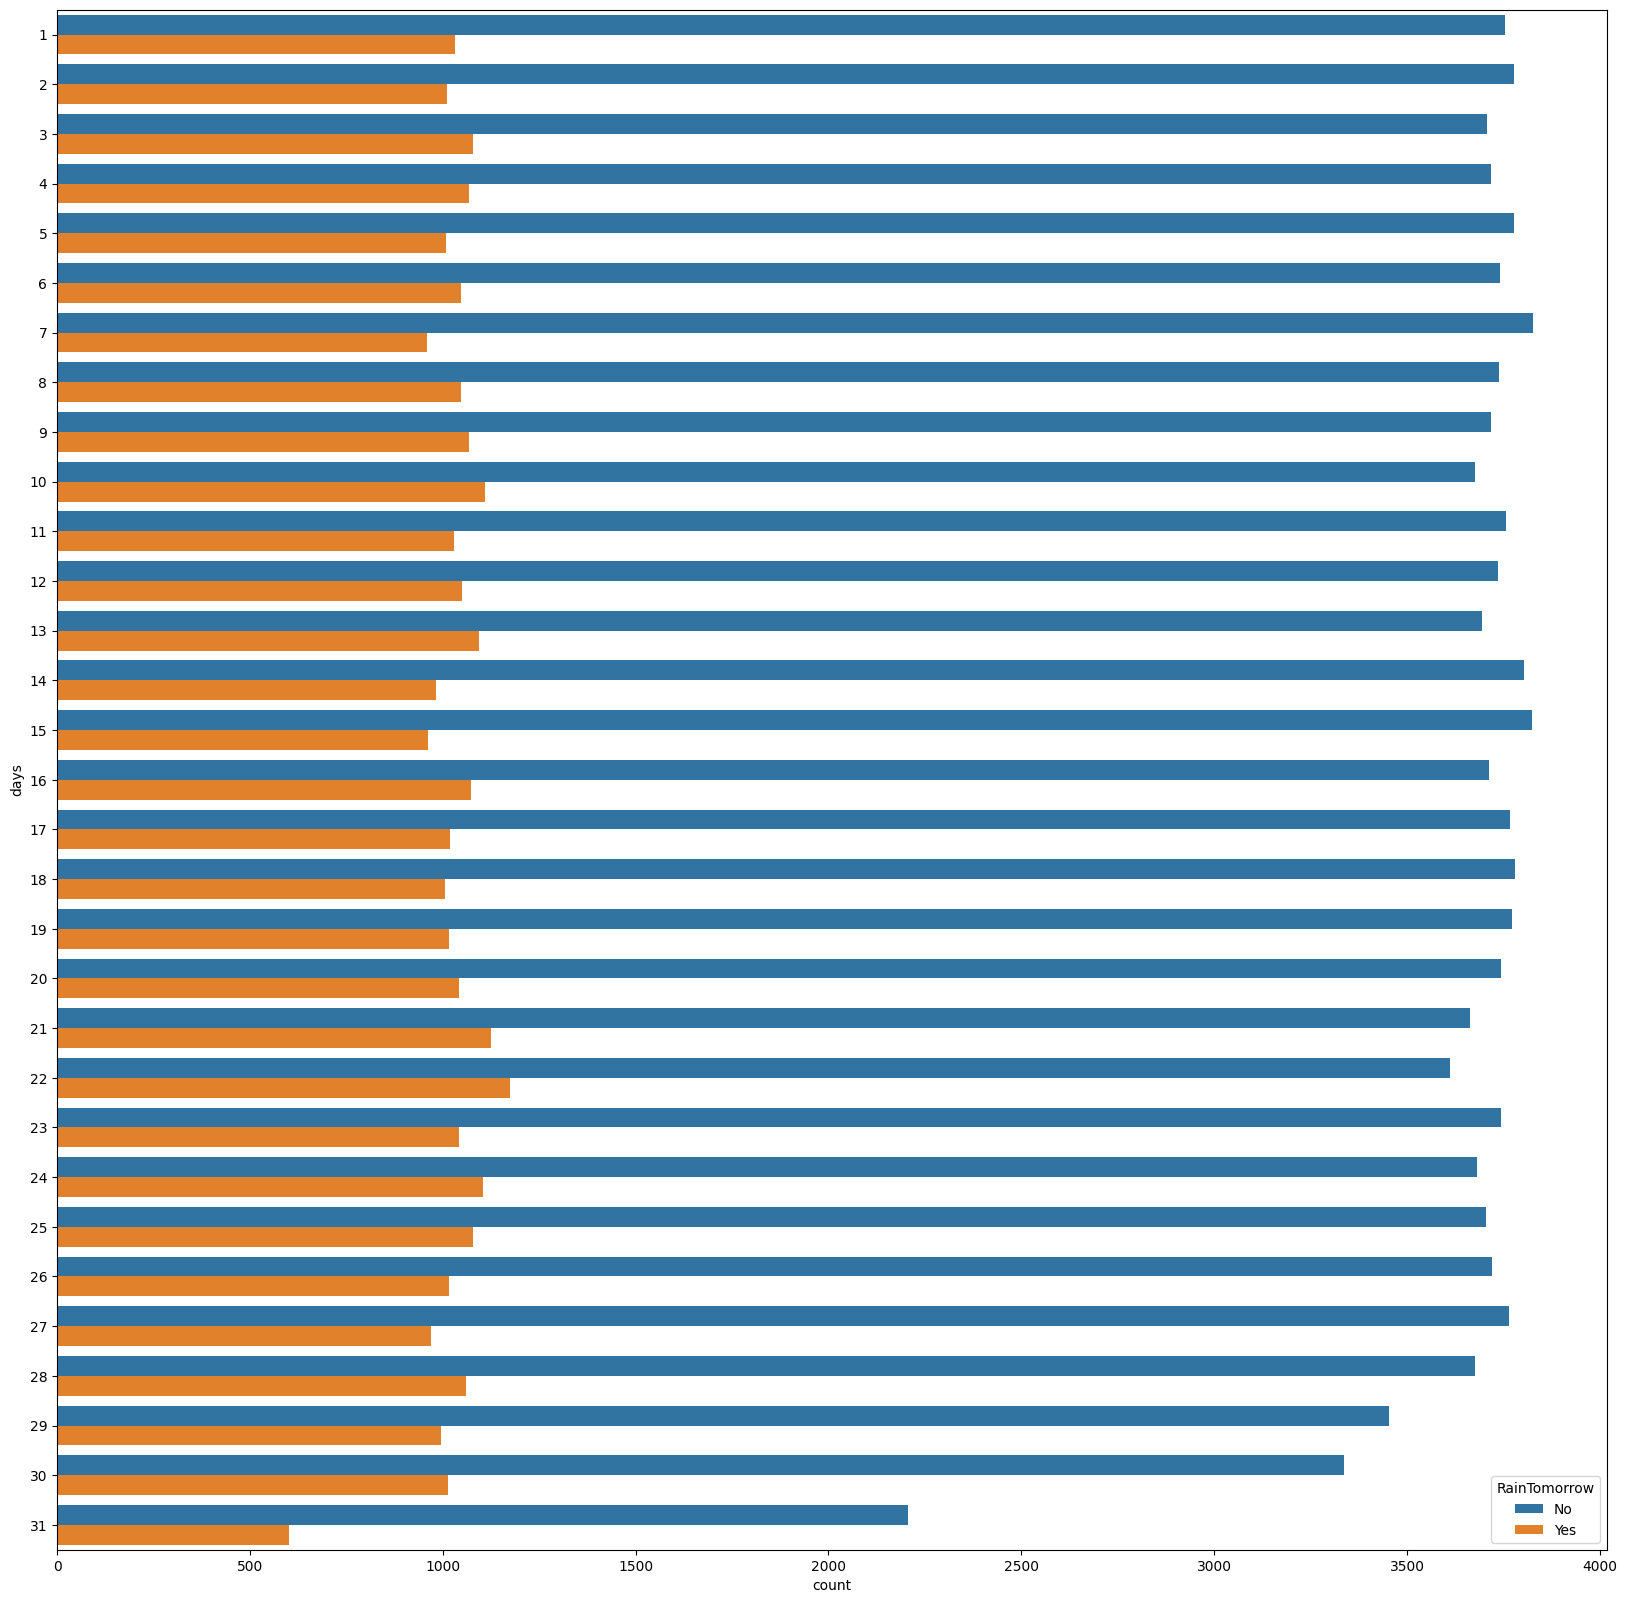

In [29]:
plot_df = data_preprocessed[['days','RainToday', 'RainTomorrow']]
# plot_df = pd.DataFrame(data_preprocessed.groupby(by= ['Location','RainToday', 'RainTomorrow'])sort_values(by='RainToday', ascending = False).head(10))
plt.figure(figsize = [20, 20])
sns.countplot(data = plot_df , y = 'days',hue ='RainTomorrow', orient = 'h')
plt.show();

**Q4. In which year the intensity of rainfall is very high?**

**Q5. In which day of the week the intensity of rainfall is very high?**

**Q6. What is the relation with the average temp ,rainfall tomorrow and today's rainfall?**|

In [30]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name'],
      dtype='object')

<Axes: xlabel='MaxTemp', ylabel='Count'>

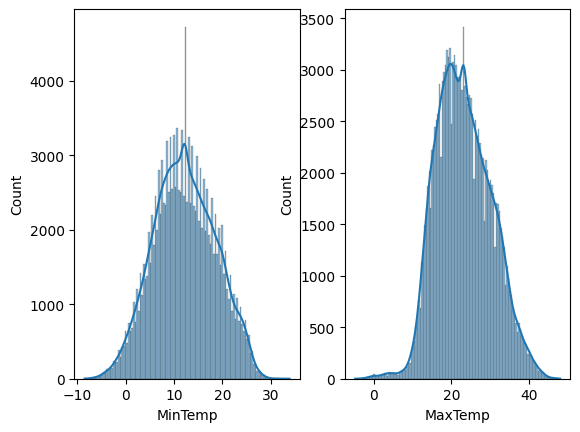

In [31]:
plt.subplot(1,2,1)
sns.histplot(data = data_preprocessed,x = 'MinTemp', kde = True)

plt.subplot(1,2,2)
sns.histplot(data = data_preprocessed,x = 'MaxTemp',kde = True)

<Axes: xlabel='MinTemp', ylabel='Location'>

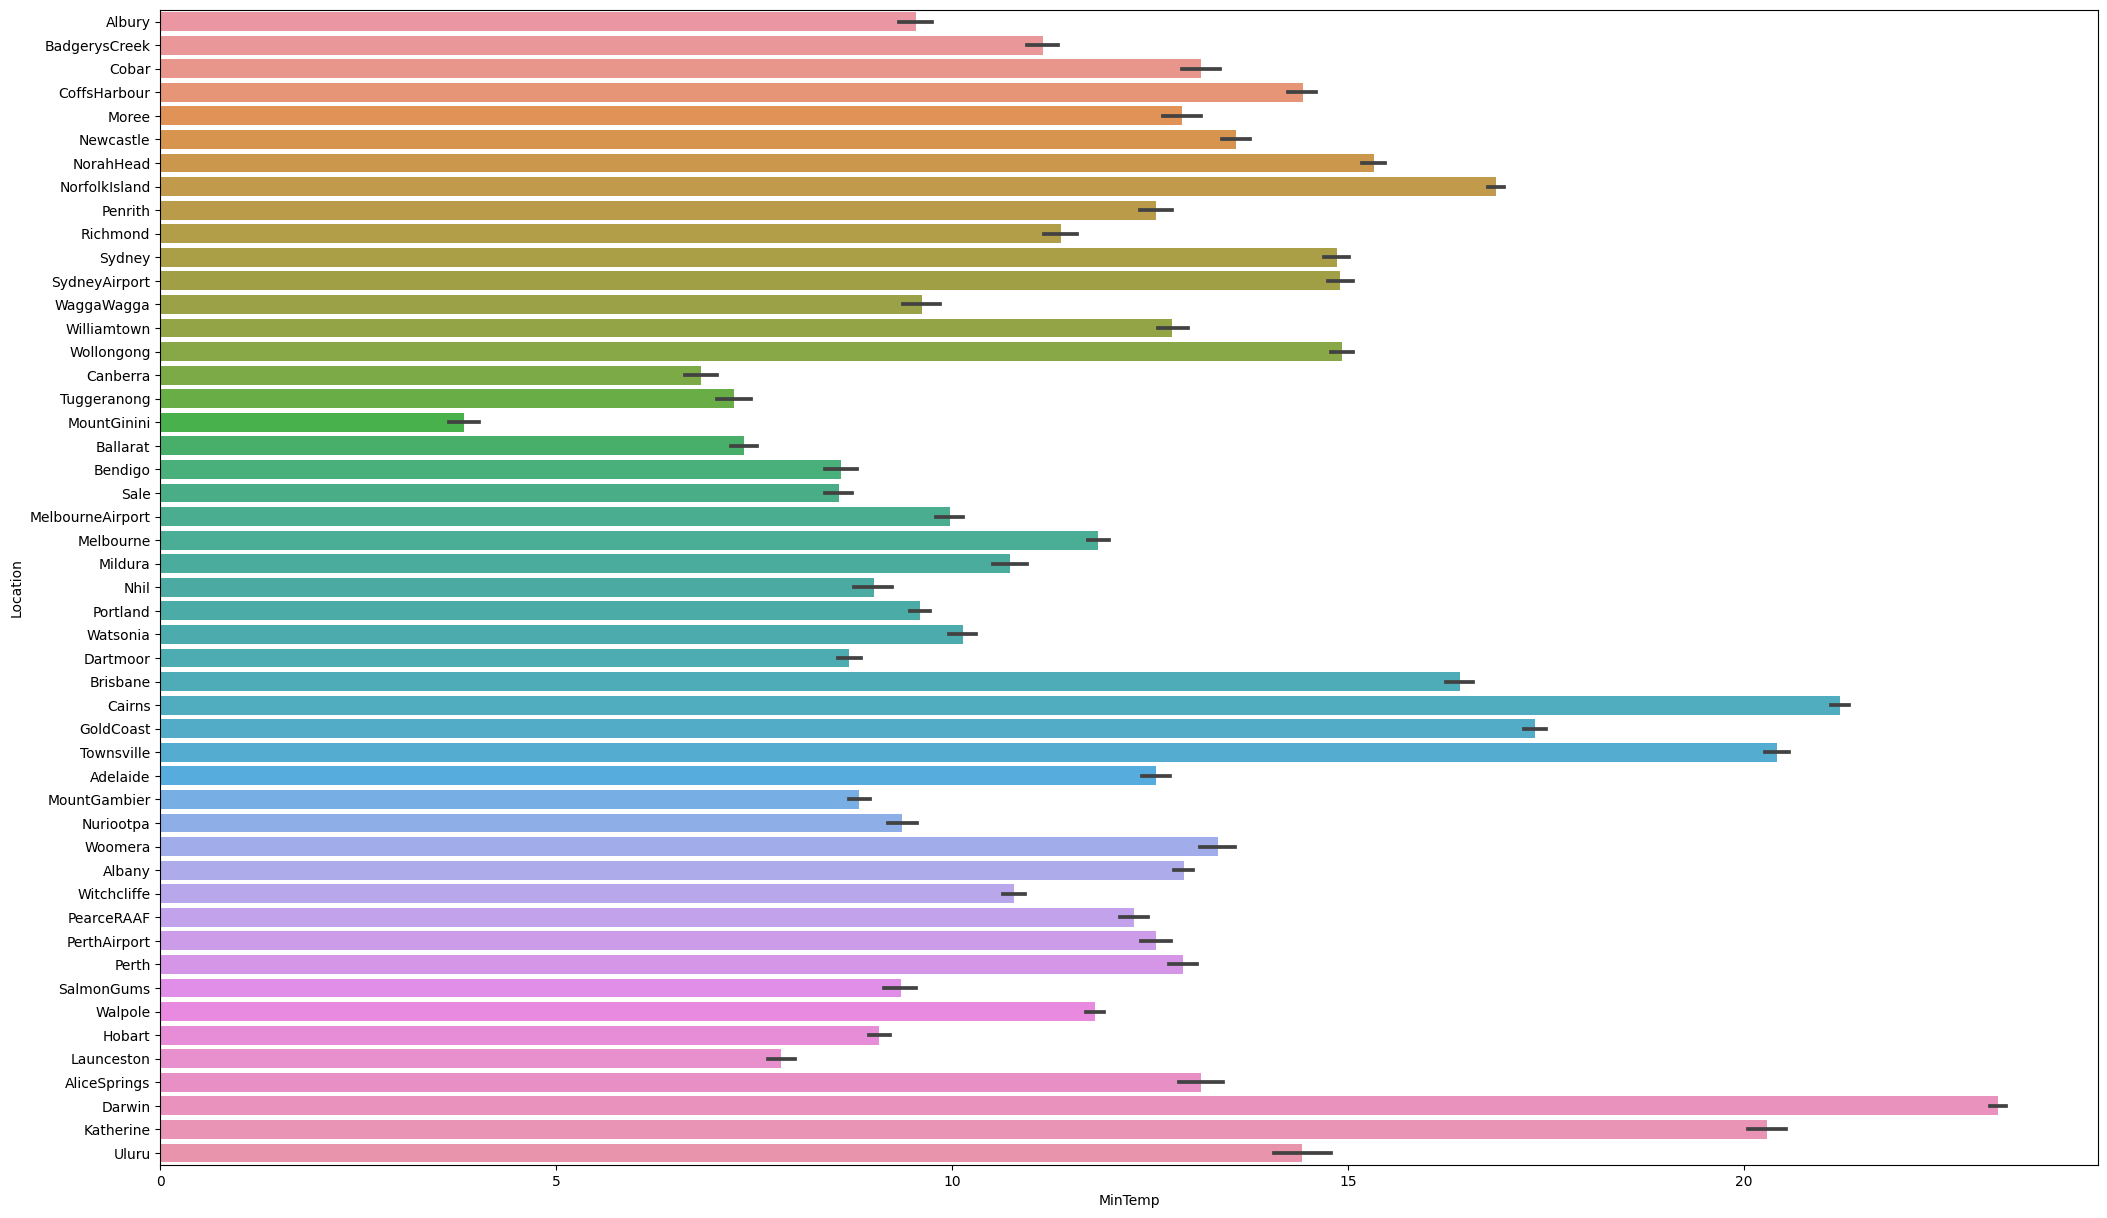

In [32]:
plt.figure(figsize = [25,15])
sns.barplot(data = data_preprocessed,x = 'MinTemp', y = 'Location', orient = 'h')

In [33]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name'],
      dtype='object')

In [34]:
# plt.subplot(1,2,1)
# labels=data_preprocessed['day_name']
# values = data_preprocessed['MinTemp']
# plt.pie(values,labels =labels)
# # sns.barplot(data = data_preprocessed,x = 'MinTemp', y = 'day_name', orient = 'h')
# plt.subplot(1,2,2)
# # sns.barplot(data = data_preprocessed,x = 'MaxTemp', y = 'day_name', orient = 'h')
# labels=data_preprocessed['day_name']
# values = data_preprocessed['MaxTemp']
# plt.pie(values,labels =labels)

In [35]:
difference = abs(data_preprocessed['MaxTemp'] - data_preprocessed['MinTemp'])

In [36]:
data_preprocessed["difference_temp"] = difference

<BarContainer object of 7 artists>

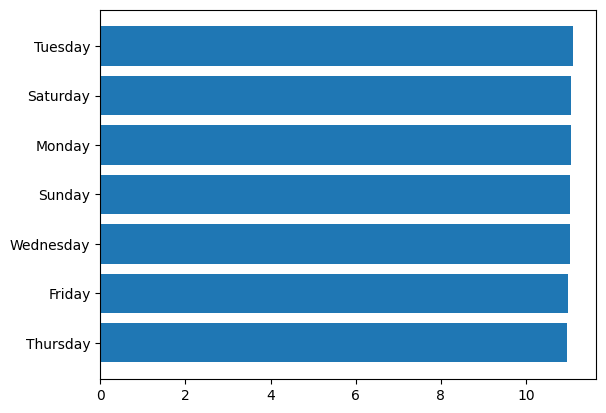

In [37]:
myindex = data_preprocessed.groupby(by = 'day_name')["difference_temp"].mean().sort_values(ascending = True).index
myvalues =data_preprocessed.groupby(by = 'day_name')["difference_temp"].mean().sort_values(ascending = True).values
plt.barh(myindex,myvalues)

**Q7. What is the relation with the average humidity ,rainfall tomorrow and today's rainfall?**

In [38]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name', 'difference_temp'],
      dtype='object')

In [39]:
data_preprocessed["average_humidity"] = (data_preprocessed["Humidity9am"] + data_preprocessed["Humidity3pm"])/2

In [40]:
data_preprocessed.groupby(by = ["day_name"])["average_humidity"].mean().sort_values(ascending = True)

day_name
Tuesday      59.851328
Wednesday    60.009054
Thursday     60.236093
Sunday       60.301262
Saturday     60.333392
Monday       60.350337
Friday       60.389311
Name: average_humidity, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Humidity3pm', ylabel='Count'>

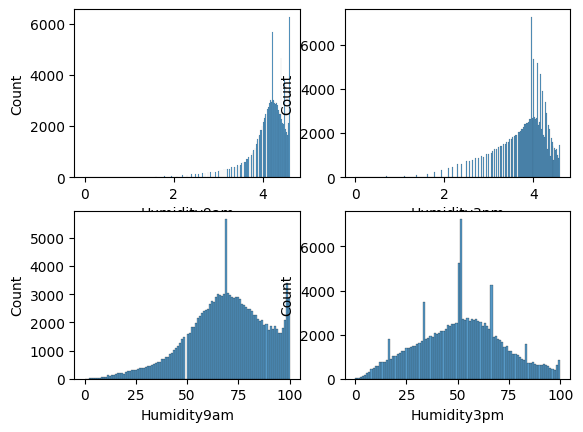

In [41]:
plt.subplot(2,2,1)
sns.histplot(np.log(data_preprocessed["Humidity9am"]))
plt.subplot(2,2,2)
sns.histplot(np.log(data_preprocessed["Humidity3pm"]))
plt.subplot(2,2,3)
sns.histplot(data_preprocessed["Humidity9am"])
plt.subplot(2,2,4)
sns.histplot(data_preprocessed["Humidity3pm"])

In [42]:
(abs(data_preprocessed["Humidity9am"]) < 0).values.tolist()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


**Q8. What is the relation with the average windspeed ,rainfall tomorrow and today's rainfall?**

In [43]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name', 'difference_temp', 'average_humidity'],
      dtype='object')

In [48]:
ws_9am_min ,ws_9am_max =  data_preprocessed['WindSpeed9am'].min(),data_preprocessed['WindSpeed9am'].max()

In [49]:
ws_9am_list = []
for ws in data['WindSpeed9am']:
    if ws > data['WindSpeed9am'].mean():
        ws_9am_list.append("greater_than_average")
    else:
        ws_9am_list.append("less_than_average")

In [50]:
data_preprocessed['WindSpeed9am_cat'] = ws_9am_list

In [52]:
data_preprocessed['WindSpeed9am_cat'].value_counts().index

Index(['less_than_average', 'greater_than_average'], dtype='object')

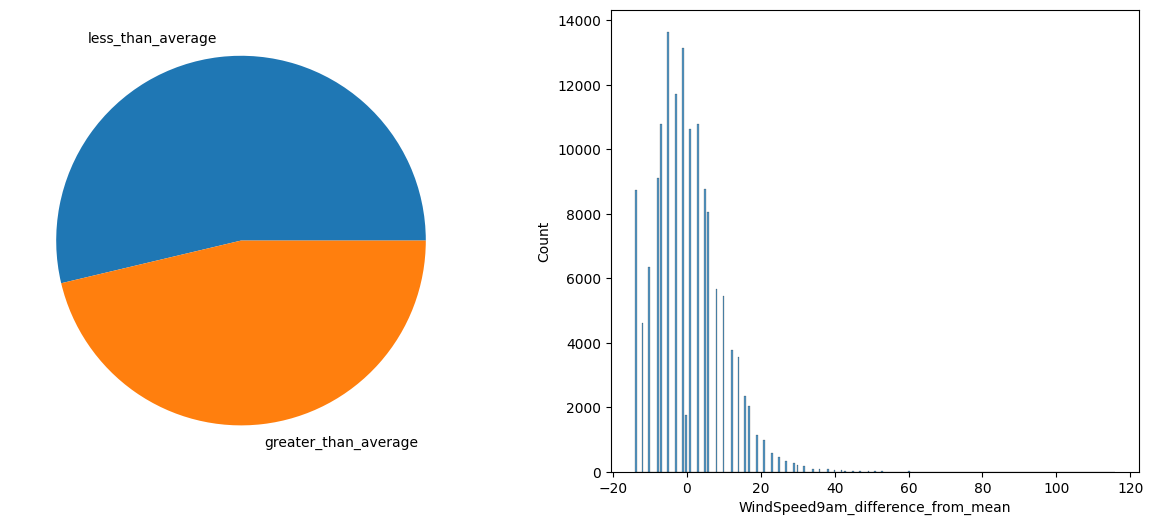

In [72]:
ws_9am_diff_from_mean_list = []
for ws in data_preprocessed['WindSpeed9am']:
    difference = ws - data['WindSpeed9am'].mean()
    ws_9am_diff_from_mean_list.append(difference)
data_preprocessed['WindSpeed9am_difference_from_mean'] = ws_9am_diff_from_mean_list

plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
labels = data_preprocessed['WindSpeed9am_cat'].value_counts().index
values = data_preprocessed['WindSpeed9am_cat'].value_counts().values
plt.pie(values, labels=labels)

plt.subplot(1,2,2)
sns.histplot(data_preprocessed['WindSpeed9am_difference_from_mean'])
plt.show();

  0%|          | 0/145460 [00:00<?, ?it/s]

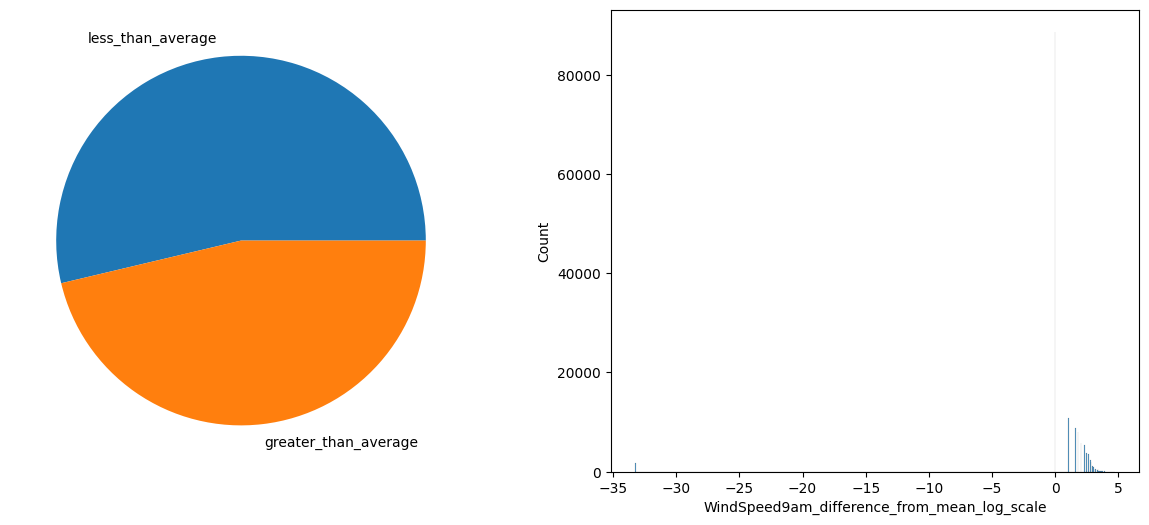

In [70]:
# Checking for the log scale distribution
from tqdm.notebook import tqdm
ws_9am_diff_from_mean_list_log_scale = []
for ws in tqdm(data_preprocessed['WindSpeed9am']):
    difference = ws - data['WindSpeed9am'].mean()
    if difference < 0:
        ws_9am_diff_from_mean_list_log_scale.append(0)
    else:
        ws_9am_diff_from_mean_list_log_scale.append(np.log(difference))
data_preprocessed['WindSpeed9am_difference_from_mean_log_scale'] = ws_9am_diff_from_mean_list_log_scale
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
labels = data_preprocessed['WindSpeed9am_cat'].value_counts().index
values = data_preprocessed['WindSpeed9am_cat'].value_counts().values
plt.pie(values, labels=labels)

plt.subplot(1,2,2)
sns.histplot(data_preprocessed['WindSpeed9am_difference_from_mean_log_scale'])
plt.show();

In [71]:
ws_9am_diff_from_mean_list_log_scale

[1.7844954978578467,
 0,
 1.6007147934241008,
 0,
 0,
 1.6007147934241008,
 1.7844954978578467,
 0,
 0,
 -0.044397038811136456,
 1.0840311943204497,
 -0.044397038811136456,
 2.635950657834504,
 2.298233045059547,
 0,
 -33.27106466687737,
 0,
 0,
 2.298233045059547,
 1.0840311943204497,
 0,
 1.0840311943204497,
 1.6007147934241008,
 0,
 0,
 0,
 0,
 0,
 1.6007147934241008,
 0,
 1.0840311943204497,
 1.6007147934241008,
 1.6007147934241008,
 0,
 0,
 0,
 0,
 0,
 1.0840311943204497,
 1.7844954978578467,
 -0.044397038811136456,
 0,
 0,
 0,
 0,
 1.7844954978578467,
 1.7844954978578467,
 1.6007147934241008,
 1.0840311943204497,
 0,
 0,
 -0.044397038811136456,
 2.4812812597484037,
 0,
 2.769870912653161,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.044397038811136456,
 1.6007147934241008,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.7844954978578467,
 1.6007147934241008,
 0,
 2.4812812597484037,
 0,
 0,
 1.0840311943204497,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.044397038811136456,
 0,
 0,
 0,
 0,
 -0.044397038811136456,

  0%|          | 0/145460 [00:00<?, ?it/s]

  0%|          | 0/145460 [00:00<?, ?it/s]

<ipython-input-76-af84575efe69>:28: RuntimeWarning: divide by zero encountered in log
  ws_3pm_diff_from_mean_list_log_scale.append(np.log(difference))


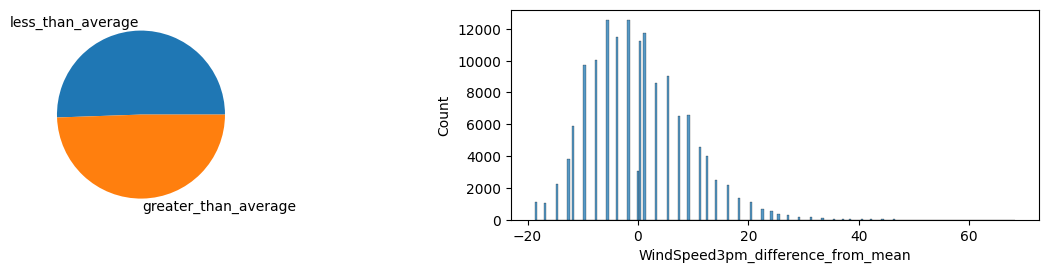

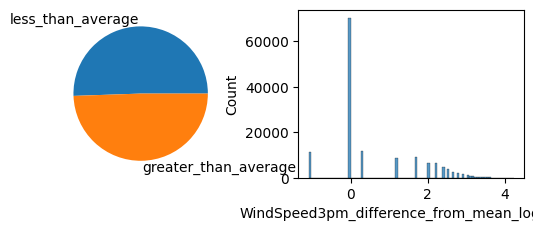

In [76]:

# Checking for the log scale distribution
from tqdm.notebook import tqdm

ws_3pm_min ,ws_3pm_max =  data_preprocessed['WindSpeed3pm'].min(),data_preprocessed['WindSpeed3pm'].max()
ws_3pm_list = []
for ws in data['WindSpeed3pm']:
    if ws > data['WindSpeed3pm'].mean():
        ws_3pm_list.append("greater_than_average")
    else:
        ws_3pm_list.append("less_than_average")

data_preprocessed['WindSpeed3pm_cat'] = ws_3pm_list


ws_3pm_diff_from_mean_list = []
for ws in tqdm(data_preprocessed['WindSpeed3pm']):
    difference = ws - data['WindSpeed3pm'].mean()
    ws_3pm_diff_from_mean_list.append(difference)

data_preprocessed['WindSpeed3pm_difference_from_mean'] = ws_3pm_diff_from_mean_list

ws_3pm_diff_from_mean_list_log_scale = []
for ws in tqdm(data_preprocessed['WindSpeed3pm']):
    difference = ws - data['WindSpeed3pm'].mean()
    if difference < 0:
        ws_3pm_diff_from_mean_list_log_scale.append(0)
    else:
        ws_3pm_diff_from_mean_list_log_scale.append(np.log(difference))
data_preprocessed['WindSpeed3pm_difference_from_mean_log_scale'] = ws_3pm_diff_from_mean_list_log_scale

plt.figure(figsize = [15,6])
plt.subplot(2,2,1)
labels = data_preprocessed['WindSpeed3pm_cat'].value_counts().index
values = data_preprocessed['WindSpeed3pm_cat'].value_counts().values
plt.pie(values, labels=labels)

plt.subplot(2,2,2)
sns.histplot(data_preprocessed['WindSpeed3pm_difference_from_mean'])
plt.show();

plt.subplot(2,2,3)
labels = data_preprocessed['WindSpeed3pm_cat'].value_counts().index
values = data_preprocessed['WindSpeed3pm_cat'].value_counts().values
plt.pie(values, labels=labels)

plt.subplot(2,2,4)
sns.histplot(data_preprocessed['WindSpeed3pm_difference_from_mean_log_scale'])
plt.show();

<ipython-input-82-6382362d7326>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_preprocessed.corr(), annot= True)


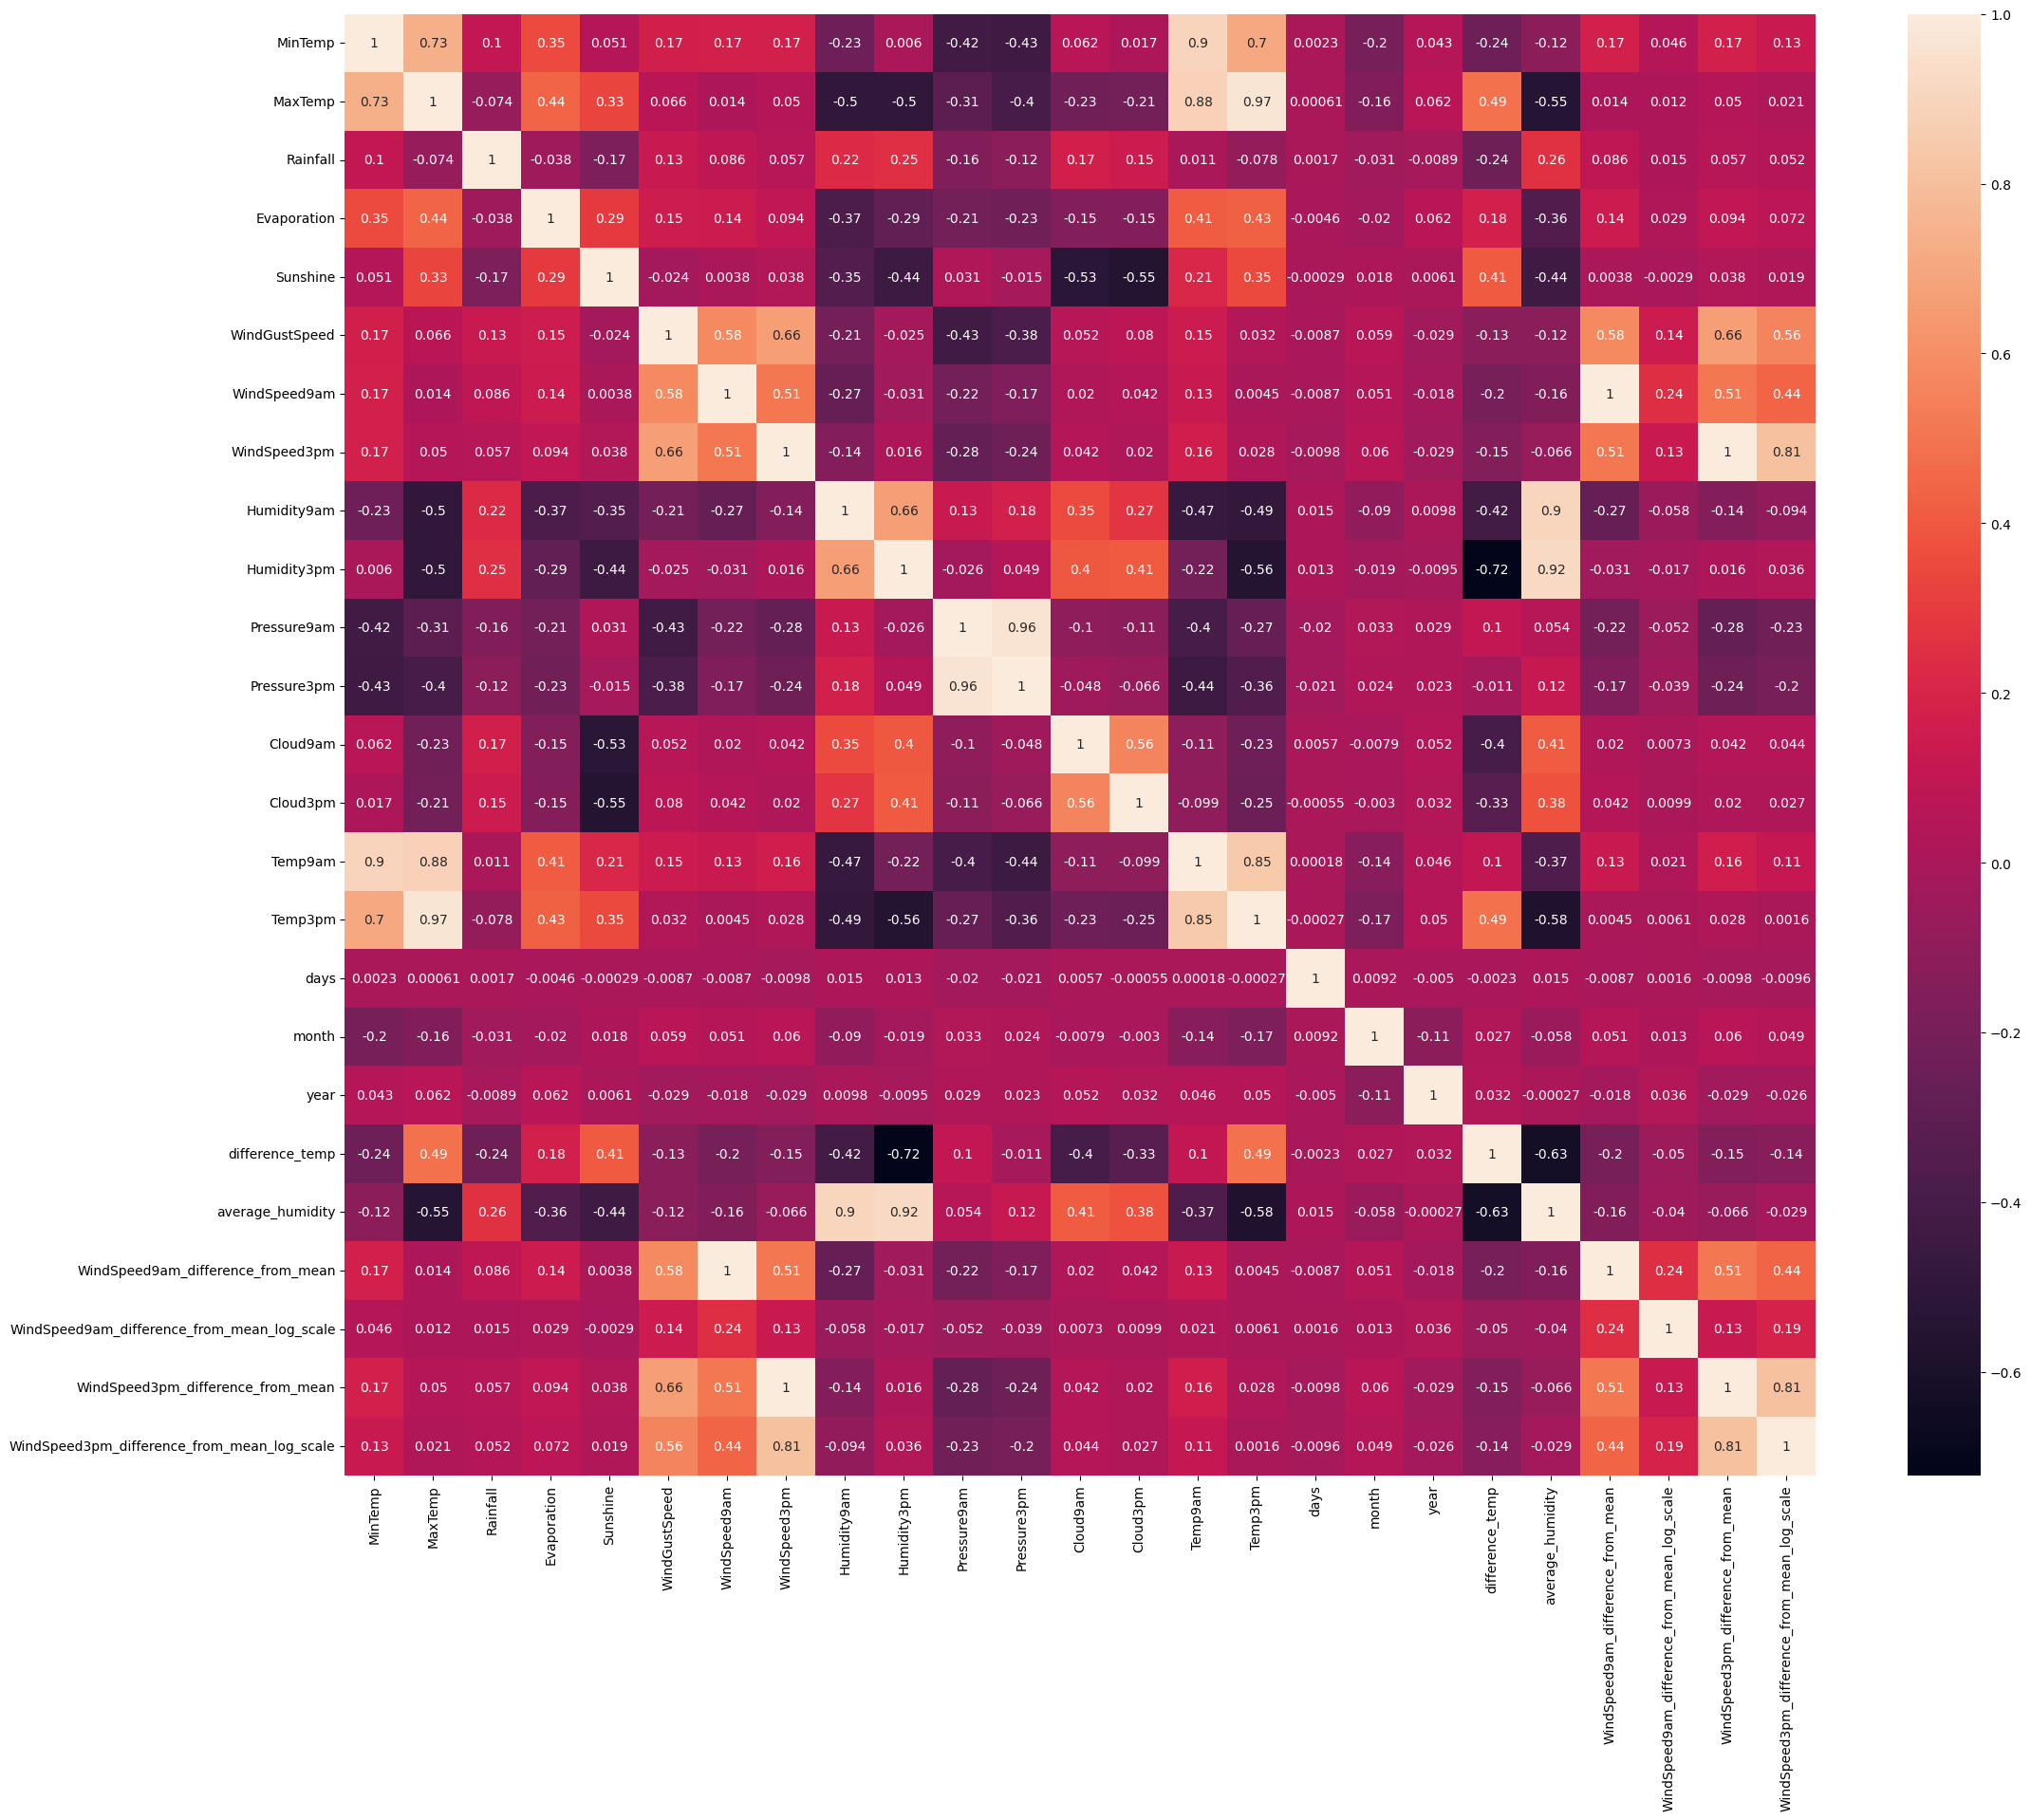

In [82]:
fig = plt.figure(figsize = [25,20])
sns.heatmap(data_preprocessed.corr(), annot= True)
plt.show();
fig.savefig('data_corr.PNG')
# fig.savefig('fig2.PNG')

**Q9. What is the relation with the average pressure ,rainfall tomorrow and today's rainfall?**

In [73]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name', 'difference_temp', 'average_humidity', 'WindSpeed9am_cat',
       'WindSpeed9am_difference_from_mean',
       'WindSpeed9am_difference_from_mean_log_scale'],
      dtype='object')

**Q10. In which direction we are getting the max and min,rainfall tomorrow and today's rainfall?**

### **Trainng**

In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in data_preprocessed.columns:
    if data_preprocessed[col].dtypes =="object":
        data_preprocessed[col] = encoder.fit_transform(data_preprocessed[col])

In [84]:
data_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,year,day_name,difference_temp,average_humidity,WindSpeed9am_cat,WindSpeed9am_difference_from_mean,WindSpeed9am_difference_from_mean_log_scale,WindSpeed3pm_cat,WindSpeed3pm_difference_from_mean,WindSpeed3pm_difference_from_mean_log_scale
0,396,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,2008,1,9.5,46.5,0,5.956574,1.784495,0,5.337343,1.674728
1,397,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,2008,5,17.7,34.5,1,-10.043426,0.000000,0,3.337343,1.205175
2,398,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,2008,6,12.8,34.0,0,4.956574,1.600715,0,7.337343,1.992977
3,399,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,2008,4,18.8,30.5,1,-3.043426,0.000000,1,-9.662657,0.000000
4,400,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,2008,0,14.8,57.5,1,-7.043426,0.000000,0,1.337343,0.290685


In [85]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'days', 'month', 'year',
       'day_name', 'difference_temp', 'average_humidity', 'WindSpeed9am_cat',
       'WindSpeed9am_difference_from_mean',
       'WindSpeed9am_difference_from_mean_log_scale', 'WindSpeed3pm_cat',
       'WindSpeed3pm_difference_from_mean',
       'WindSpeed3pm_difference_from_mean_log_scale'],
      dtype='object')

In [87]:
from sklearn.model_selection import train_test_split

X = data_preprocessed.drop(['RainTomorrow'], axis =1)
y = data_preprocessed['RainTomorrow']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [92]:
# Making of a classifer that is sequential object
classifier = Sequential()

# Adding the first layer
classifier.add(Dense(units=6,
                     kernel_initializer="glorot_uniform",
                     activation= 'relu'))

# Adding the second layer
classifier.add(Dense(units=6,
                     kernel_initializer="glorot_uniform",
                     activation= 'relu'))

# Adding the second layer
classifier.add(Dense(units=1,
                     kernel_initializer="glorot_uniform",
                     activation= 'sigmoid'))

# compilation
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Fitting the classifier with the model
model_history = classifier.fit(X_train,
                               y_train,
                               batch_size = 10,
                               epochs = 10)

Epoch 1/10
11637/11637 [==============================] - 14s 1ms/step - loss: nan - accuracy: 0.7806
Epoch 2/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 3/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 4/10
11637/11637 [==============================] - 14s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 5/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 6/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 7/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 8/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 9/10
11637/11637 [==============================] - 13s 1ms/step - loss: nan - accuracy: 0.7809
Epoch 10/10
11637/11637 [==============================] - 13s 1ms/step - loss: na

In [94]:
pd.DataFrame(model_history.history)

,loss,accuracy
0,NaN,0.780644
1,NaN,0.780876
2,NaN,0.780876
3,NaN,0.780876
4,NaN,0.780876
5,NaN,0.780876
6,NaN,0.780876
7,NaN,0.780876
8,NaN,0.780876
9,NaN,0.780876


Text(0.5, 1.0, 'Model  Acc')

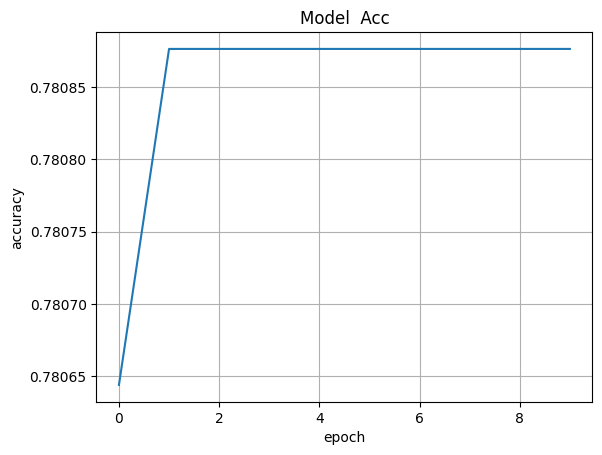

In [95]:
# Plotting accuracy
plt.plot(model_history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.title('Model  Acc')

In [96]:
predictions = classifier.predict(X_test)

910/910 [==============================] - 1s 1ms/step


In [101]:
predictions_df = pd.DataFrame(predictions)

In [103]:
predictions_df[0].fillna(0, inplace=True)

In [104]:
predictions_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
29087,0.0
29088,0.0
29089,0.0
29090,0.0


In [99]:
y_test

108707    0
112814    0
3506      0
91924     0
87954     1
         ..
88795     1
12650     0
50134     0
28709     0
140773    0
Name: RainTomorrow, Length: 29092, dtype: int64

In [106]:
from sklearn.metrics import accuracy_score
print("The accuracy score for the ANN Classifier model is :",accuracy_score(y_test,predictions_df[0])*100)

The accuracy score for the ANN Classifier model is : 78.0764471332325
